# Statistical Analysis - Milestone-2

### Distributions of numeric variables

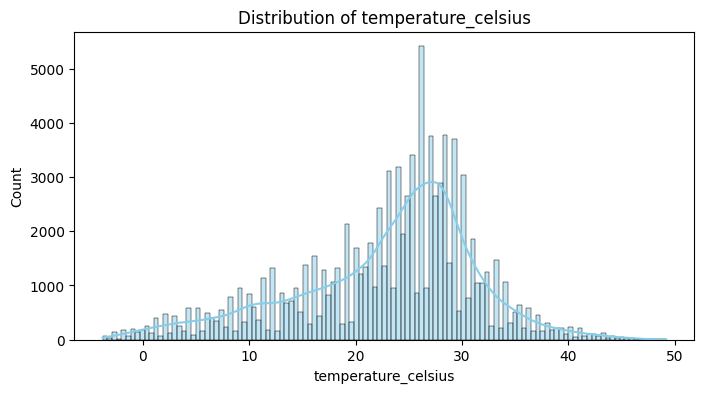

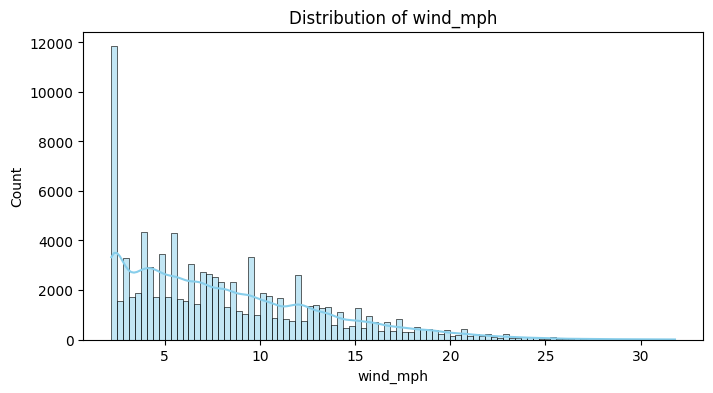

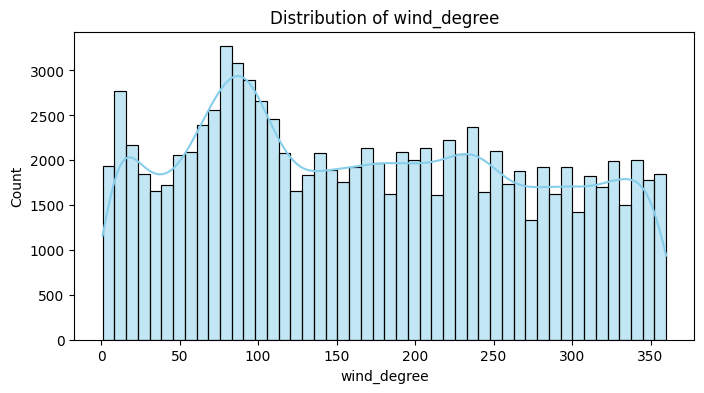

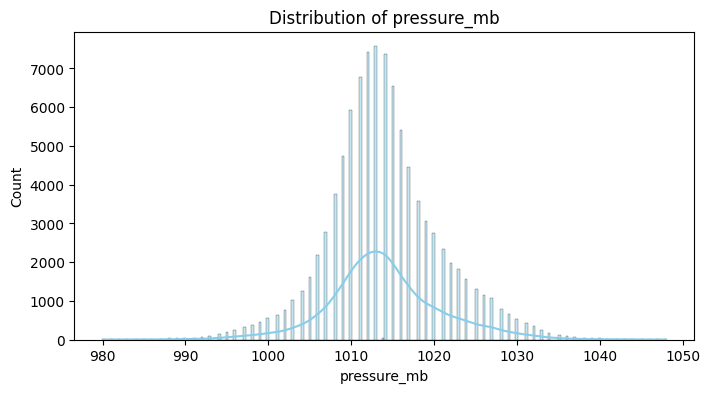

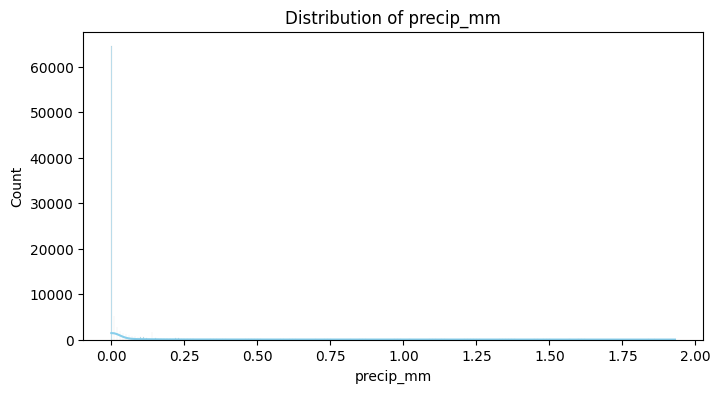

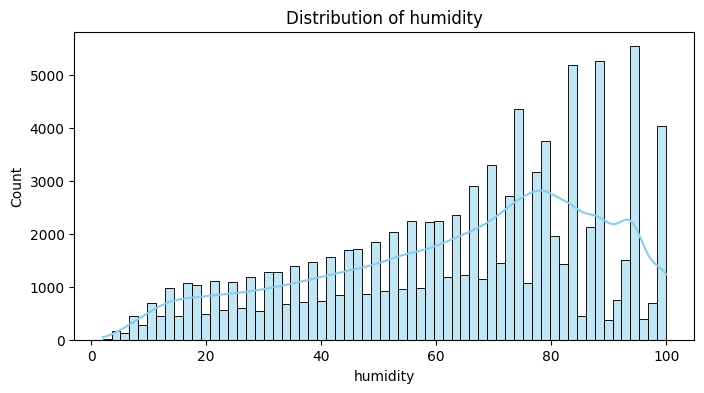

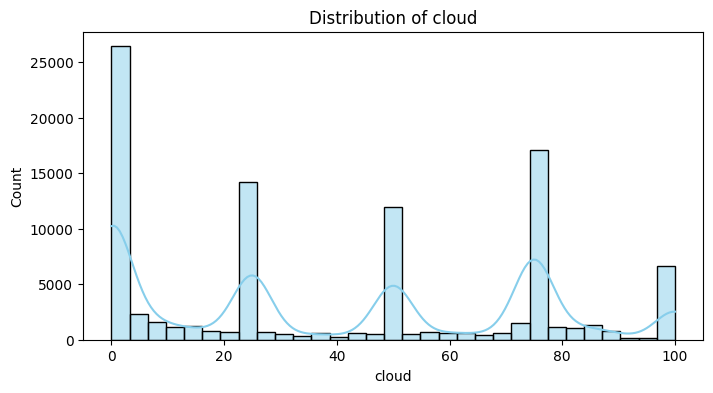

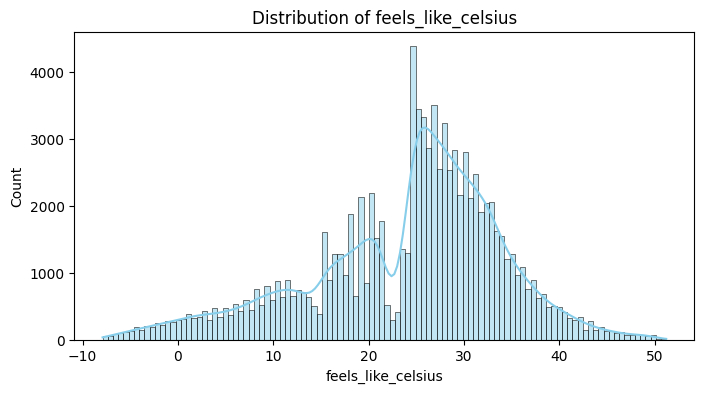

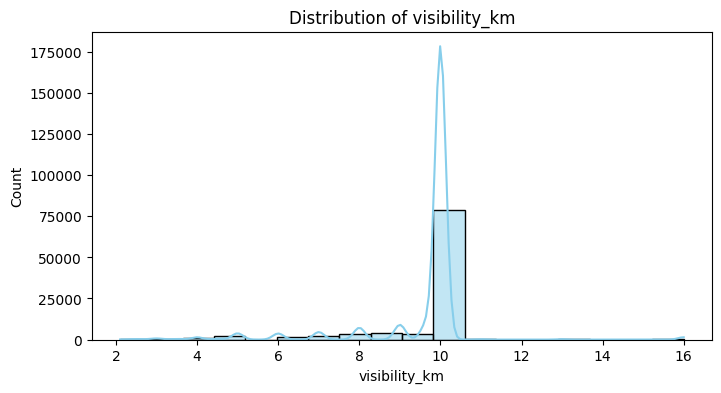

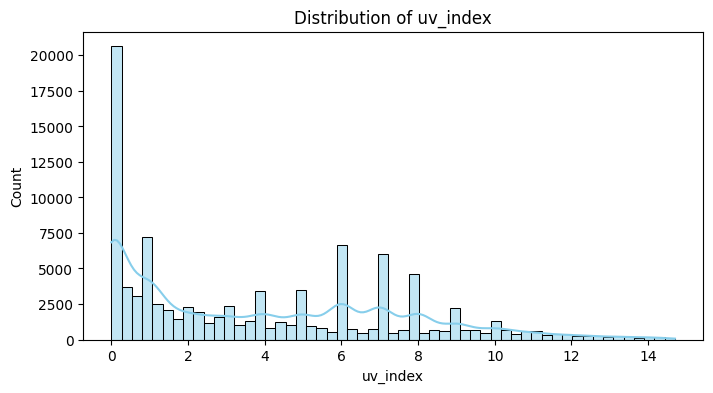

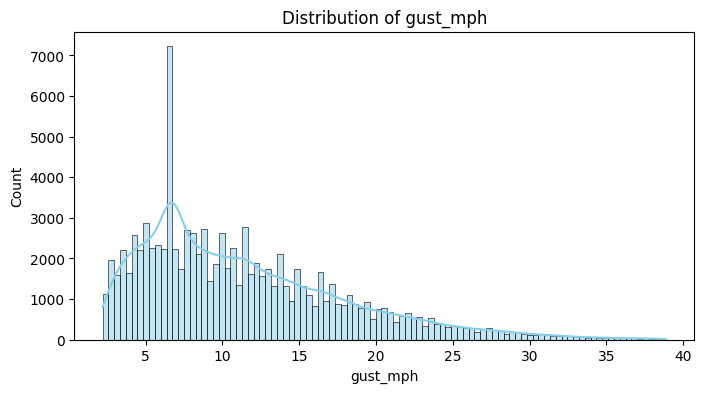

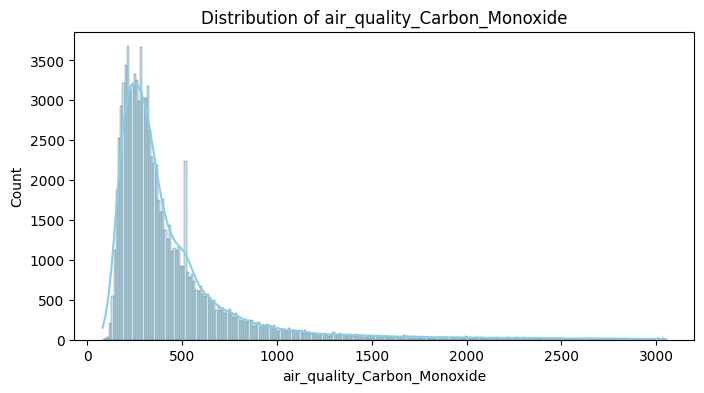

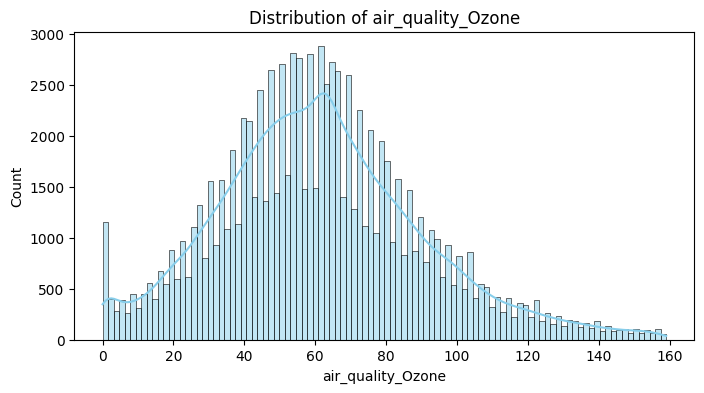

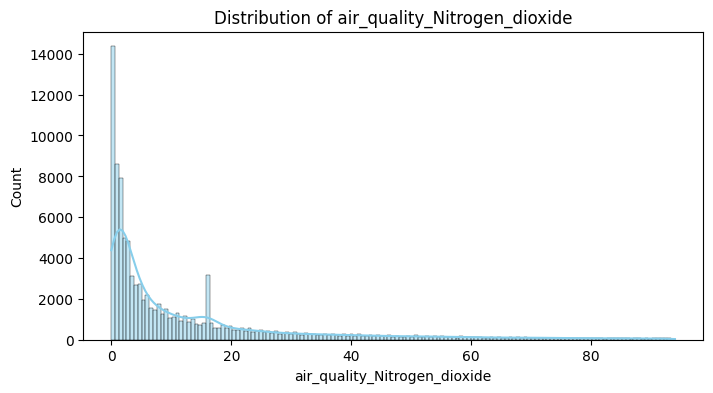

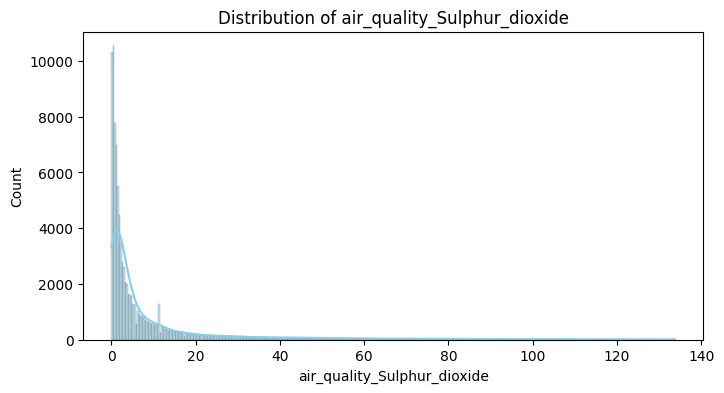

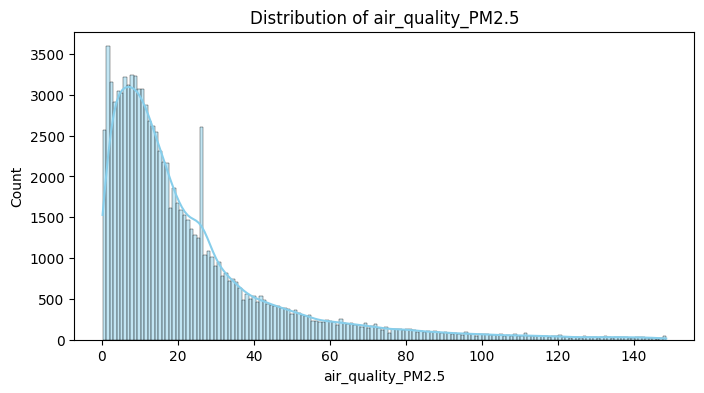

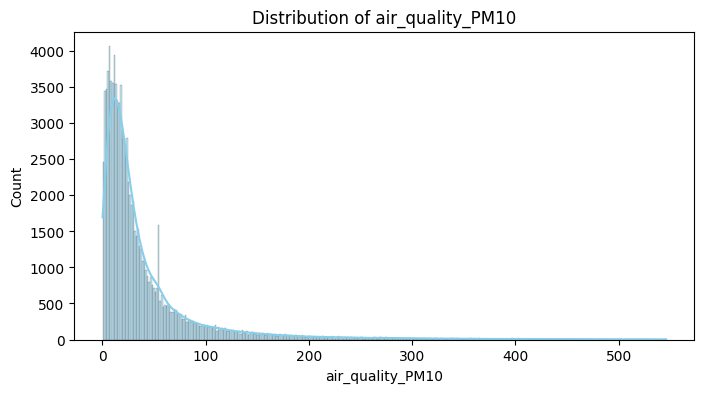

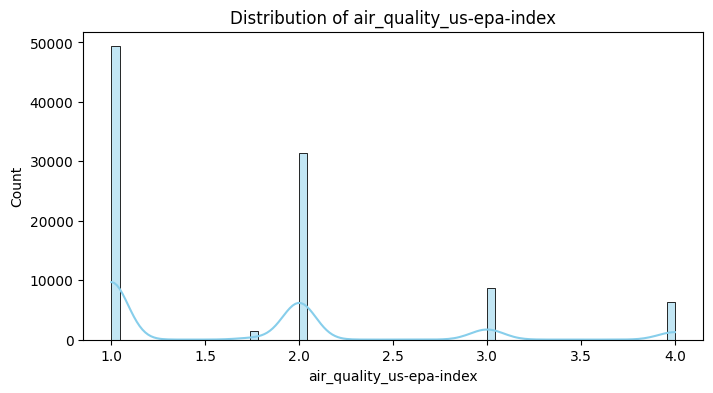

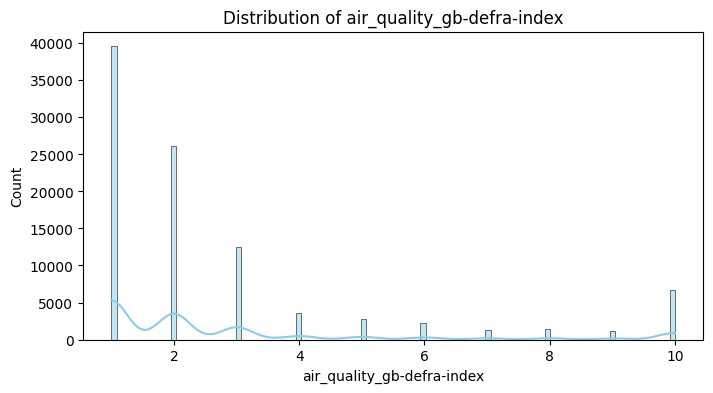

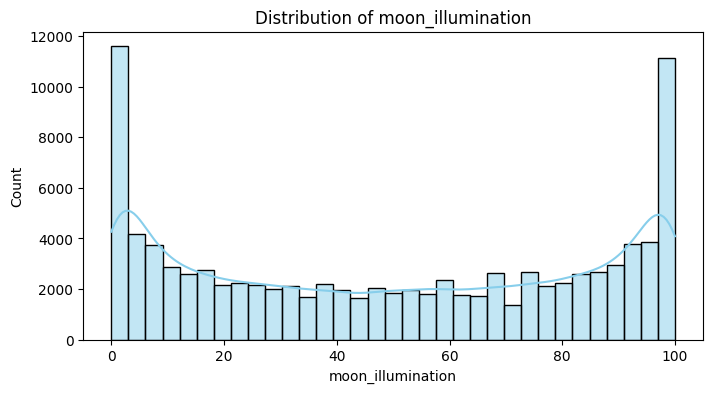

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load normalized weather data
df = pd.read_csv('../data/processed/processed_weather_data.csv', parse_dates=['last_updated'])

numeric_cols = [
    'temperature_celsius', 'wind_mph', 'wind_degree', 'pressure_mb', 'precip_mm', 
    'humidity', 'cloud', 'feels_like_celsius', 'visibility_km', 'uv_index', 'gust_mph', 
    'air_quality_Carbon_Monoxide', 'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
    'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
    'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'moon_illumination'
]

for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


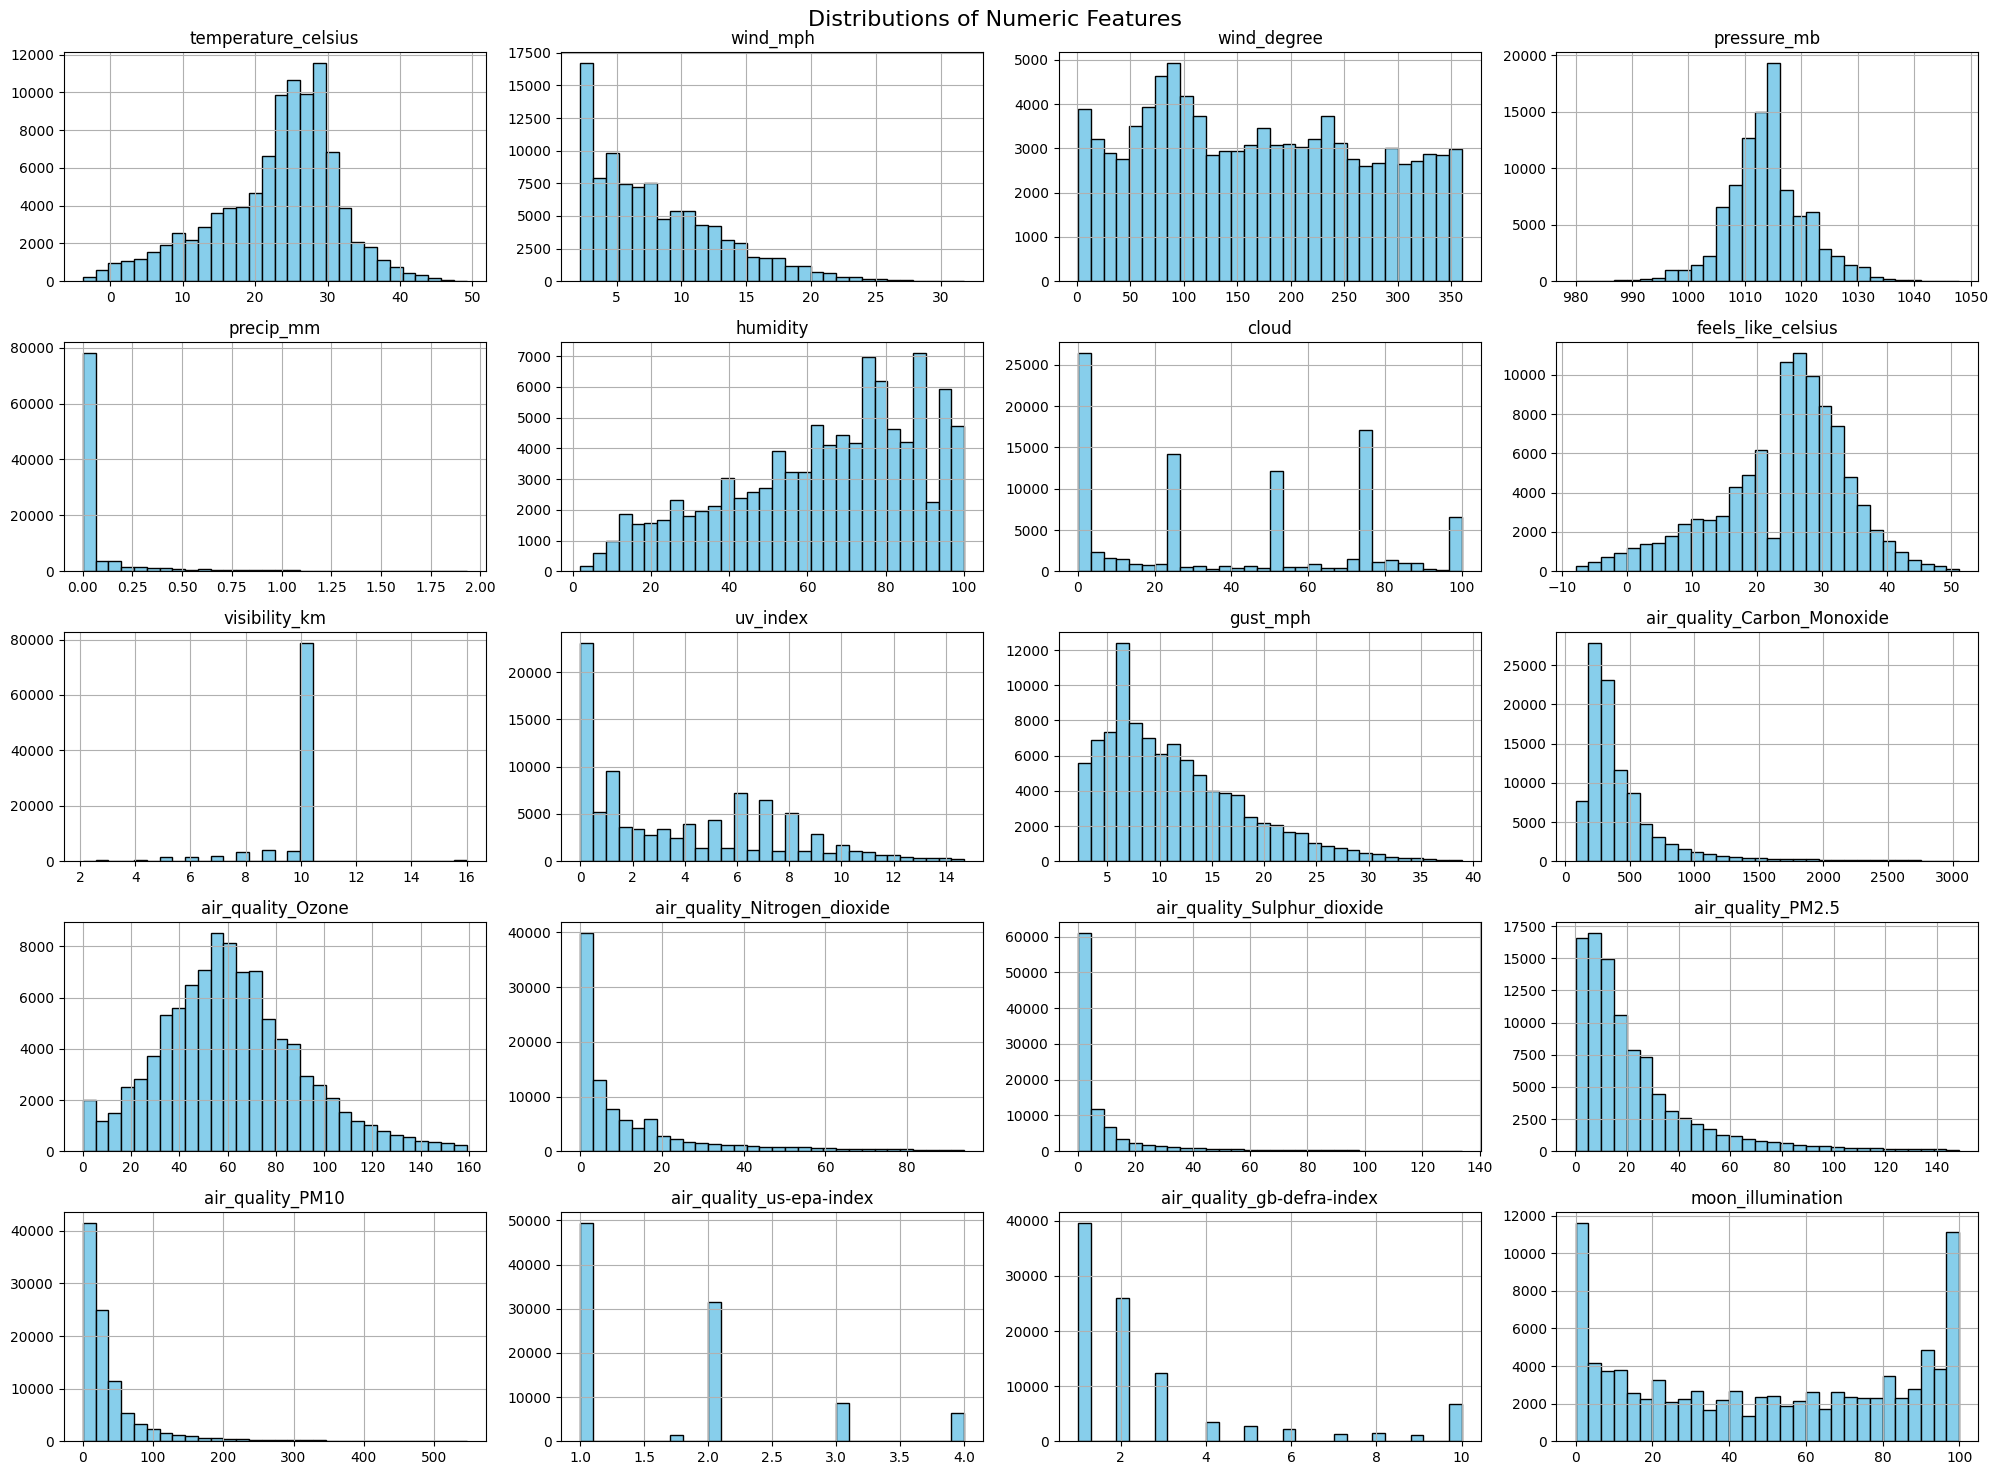

In [2]:
# Plot all histograms in one figure
df[numeric_cols].hist(bins=30, figsize=(20, 15), color='skyblue', edgecolor='black')
plt.suptitle("Distributions of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()


In [16]:
df.sample(15)

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,condition_text,wind_mph,...,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination,month,hour,day_of_week
25977,Syria,Damascus,33.5000,36.3000,Asia/Damascus,1727431200,2024-09-27 13:00:00,33.3,sunny,6.5,...,4,6:26 AM,6:24 PM,1:11 AM,3:56 PM,waning crescent,28,2024-09,13,Friday
41349,Afghanistan,Kabul,34.5167,69.1833,Asia/Kabul,1734344100,2024-12-16 14:45:00,7.6,sunny,2.7,...,2,6:53 AM,4:45 PM,5:33 PM,8:00 AM,waning gibbous,100,2024-12,14,Monday
33436,Ireland,Dublin,53.3331,-6.2489,Europe/Dublin,1730797200,2024-11-05 09:00:00,11.0,partly cloudy,7.2,...,5,7:32 AM,4:44 PM,12:26 PM,6:20 PM,waxing crescent,11,2024-11,9,Tuesday
21605,Kenya,Nairobi,-1.2800,36.8200,Africa/Nairobi,1725537600,2024-09-05 15:00:00,21.3,partly cloudy,2.2,...,1,6:28 AM,6:34 PM,7:57 AM,8:16 PM,waxing crescent,3,2024-09,15,Thursday
11086,Bosnia and Herzegovina,Sarajevo,43.8500,18.3800,Europe/Sarajevo,1720701900,2024-07-11 14:45:00,35.1,partly cloudy,5.6,...,1,5:15 AM,8:28 PM,10:40 AM,11:25 PM,waxing crescent,23,2024-07,14,Thursday
29189,Guatemala,Guatemala City,14.6211,-90.5269,America/Guatemala,1728898200,2024-10-14 03:30:00,16.4,partly cloudy,3.8,...,1,5:54 AM,5:43 PM,3:45 PM,2:58 AM,waxing gibbous,83,2024-10,3,Monday
41808,Guinea,Conakry,9.5092,-13.7122,Africa/Conakry,1734517800,2024-12-18 10:30:00,26.3,mist,10.3,...,10,7:05 AM,6:39 PM,9:52 PM,9:57 AM,waning gibbous,92,2024-12,10,Wednesday
74586,Senegal,Dakar,14.6708,-17.4381,Africa/Dakar,1749027600,2025-06-04 09:00:00,25.3,sunny,9.8,...,8,6:39 AM,7:37 PM,2:18 PM,1:59 AM,waxing gibbous,58,2025-06,9,Wednesday
45803,Argentina,Buenos Aires,-34.5875,-58.6725,America/Argentina/Buenos_Aires,1736332200,2025-01-08 07:30:00,22.2,sunny,6.7,...,1,5:52 AM,8:11 PM,3:08 PM,1:00 AM,waxing gibbous,63,2025-01,7,Wednesday
25562,Saint Kitts and Nevis,Basseterre,17.3000,-62.7200,America/St_Kitts,1727256600,2024-09-25 05:30:00,29.0,clear,14.1,...,1,6:00 AM,6:04 PM,No moonrise,1:34 PM,waning crescent,48,2024-09,5,Wednesday


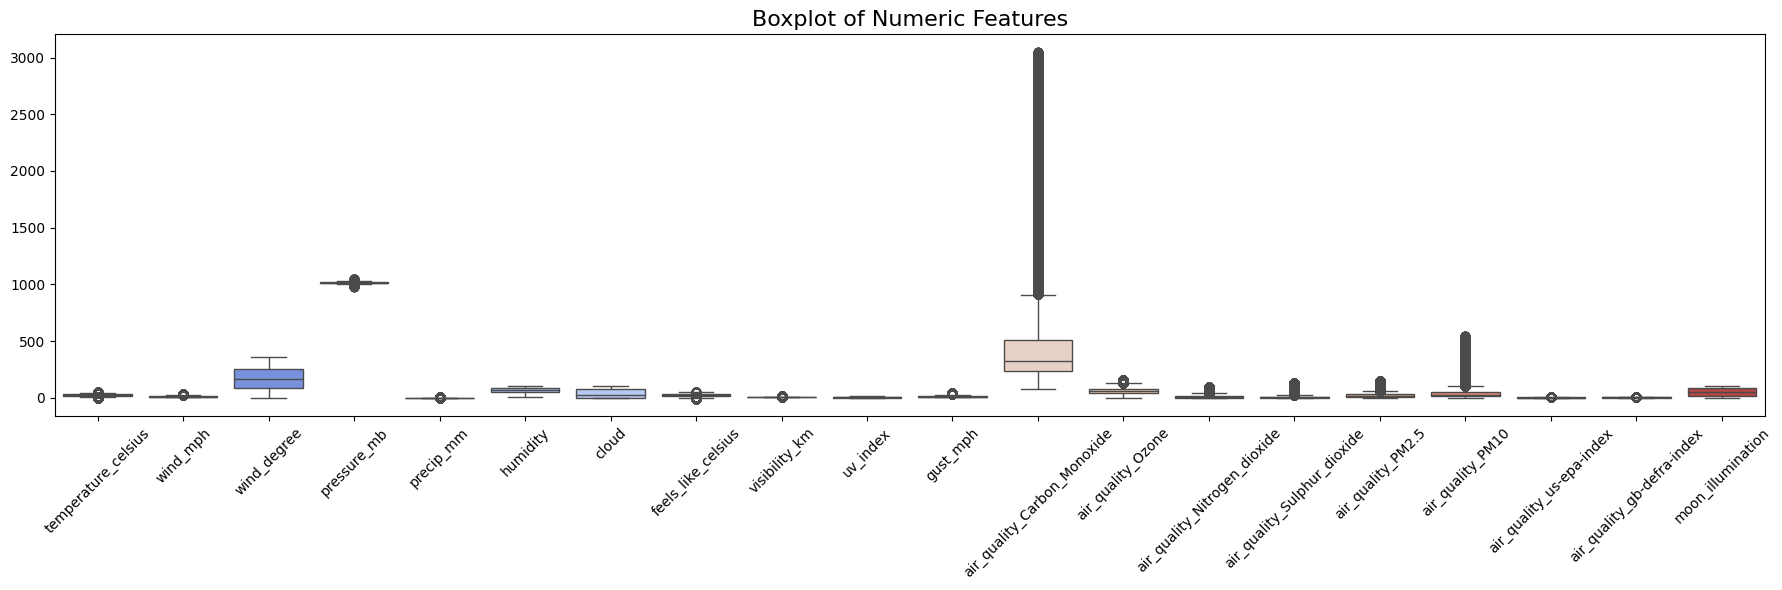

In [3]:
# Boxplot for spread and outliers
plt.figure(figsize=(18, 6))
sns.boxplot(data=df[numeric_cols], palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Boxplot of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()


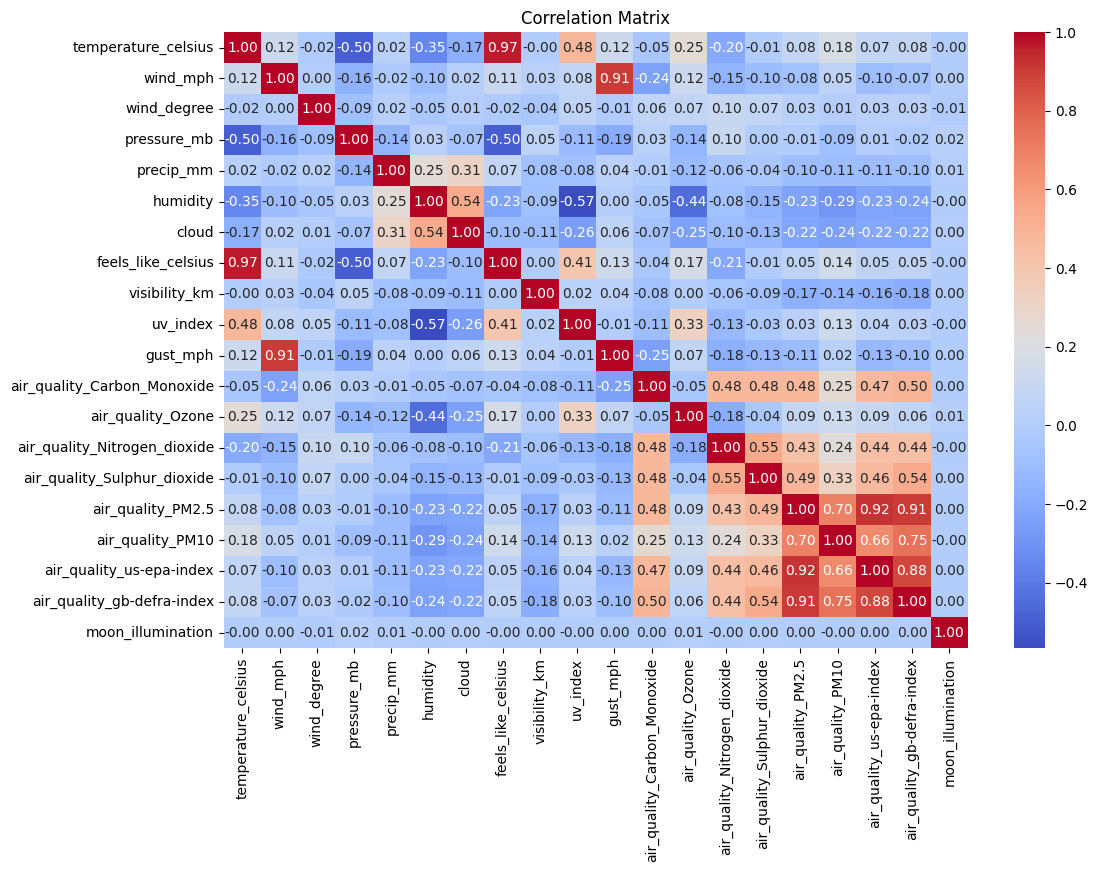

In [4]:
corr = df[numeric_cols].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

### Trends over time

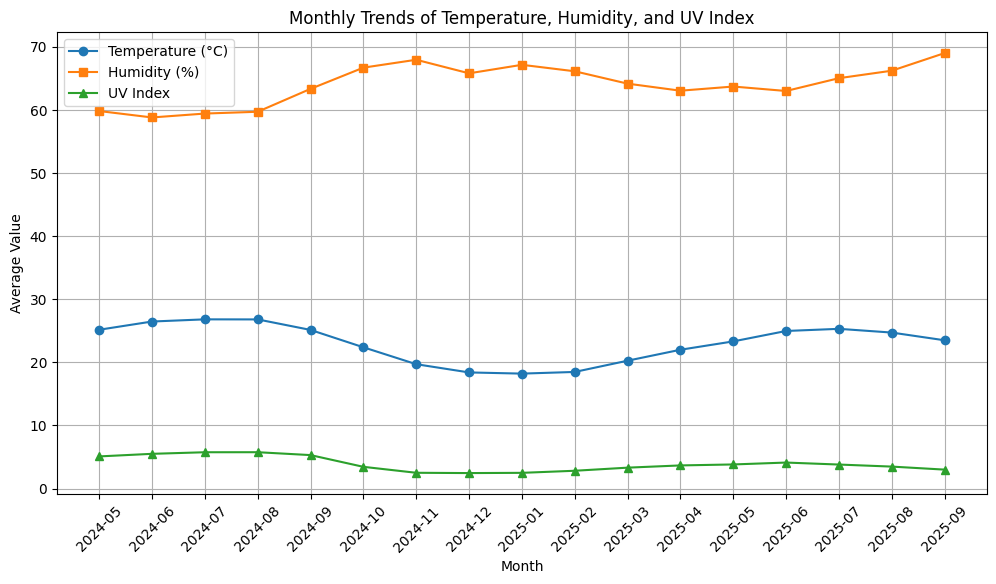

In [5]:
# Extract month and year
df['month'] = df['last_updated'].dt.to_period('M')

# Monthly average temperature, humidity, uv_index
monthly_trends = df.groupby('month')[['temperature_celsius', 'humidity', 'uv_index']].mean().reset_index()

# Plot trends
plt.figure(figsize=(12,6))
plt.plot(monthly_trends['month'].astype(str), monthly_trends['temperature_celsius'], marker='o', label='Temperature (°C)')
plt.plot(monthly_trends['month'].astype(str), monthly_trends['humidity'], marker='s', label='Humidity (%)')
plt.plot(monthly_trends['month'].astype(str), monthly_trends['uv_index'], marker='^', label='UV Index')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.title('Monthly Trends of Temperature, Humidity, and UV Index')
plt.legend()
plt.grid(True)
plt.show()

### Seasonal patterns

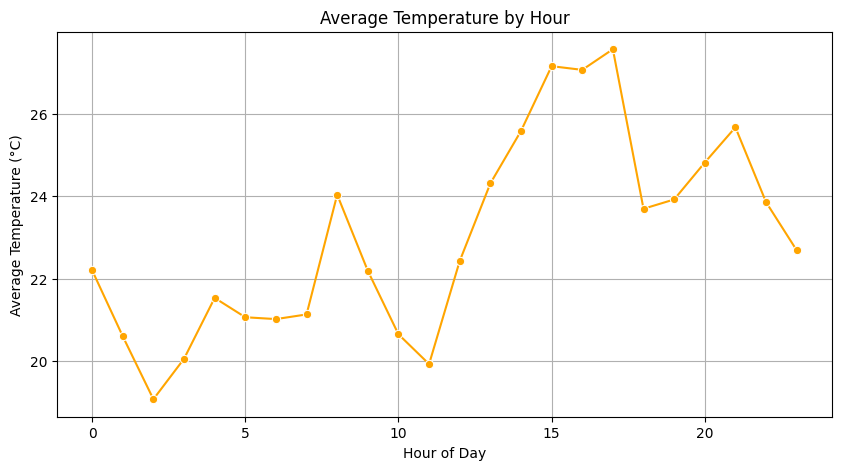

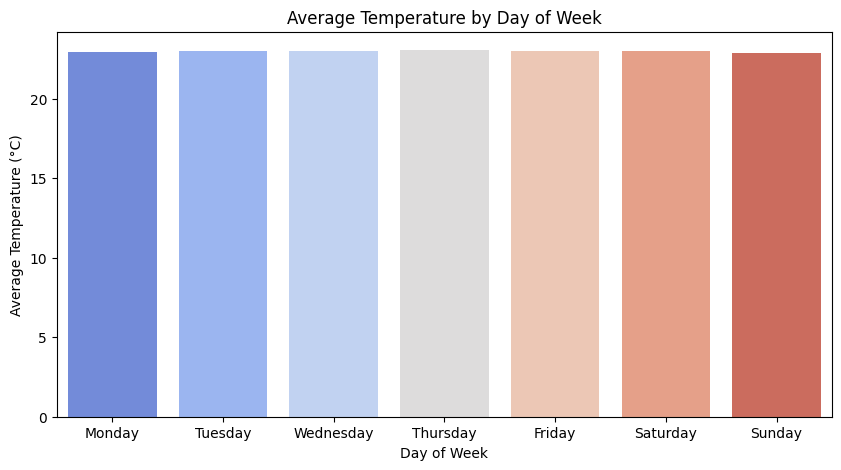

In [6]:
# Extract hour and day of week
df['hour'] = df['last_updated'].dt.hour
df['day_of_week'] = df['last_updated'].dt.day_name()

# Hourly average temperature
hourly_temp = df.groupby('hour')['temperature_celsius'].mean()

plt.figure(figsize=(10,5))
sns.lineplot(x=hourly_temp.index, y=hourly_temp.values, marker='o', color='orange')
plt.xlabel('Hour of Day')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Temperature by Hour')
plt.grid(True)
plt.show()

# Weekly average temperature
weekly_temp = df.groupby('day_of_week')['temperature_celsius'].mean()
weekly_temp = weekly_temp.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

weekly_temp_df = weekly_temp.reset_index()
weekly_temp_df.columns = ['day_of_week', 'temperature_celsius']

plt.figure(figsize=(10,5))
sns.barplot(
    x='day_of_week',
    y='temperature_celsius',
    hue='day_of_week',
    data=weekly_temp_df,
    palette='coolwarm',
    dodge=False,
    legend=False
)
plt.xlabel('Day of Week')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Temperature by Day of Week')
plt.show()

## Identify Extreme Weather Events

In [7]:
import numpy as np

# Define key variables
extreme_cols = ['temperature_celsius', 'precip_mm', 'wind_mph', 'uv_index', 'humidity']

# Compute thresholds
thresholds = {}
for col in extreme_cols:
    upper = np.percentile(df[col], 95)
    lower = np.percentile(df[col], 5)
    thresholds[col] = {'lower': lower, 'upper': upper}

# Identify extremes
extreme_events = df.copy()
for col in extreme_cols:
    mask = (extreme_events[col] >= thresholds[col]['upper']) | (extreme_events[col] <= thresholds[col]['lower'])
    extreme_events = extreme_events.loc[mask]


print("Extreme Event Thresholds:")
for col, val in thresholds.items():
    print(f"{col}: lower={val['lower']:.2f}, upper={val['upper']:.2f}")

print("\nExtreme Weather Records Detected:", extreme_events.shape[0])
extreme_events.head()

Extreme Event Thresholds:
temperature_celsius: lower=6.10, upper=35.00
precip_mm: lower=0.00, upper=0.64
wind_mph: lower=2.20, upper=18.10
uv_index: lower=0.00, upper=10.30
humidity: lower=18.00, upper=96.00

Extreme Weather Records Detected: 105


,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,condition_text,wind_mph,...,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination,month,hour,day_of_week
6313,Iraq,Baghdad,33.34,44.39,Asia/Baghdad,1718545500,2024-06-16 16:45:00,46.6,sunny,18.8,...,2,4:53 AM,7:14 PM,1:58 PM,12:59 AM,waxing gibbous,67,2024-06,16,Sunday
6697,Iraq,Baghdad,33.34,44.39,Asia/Baghdad,1718719200,2024-06-18 17:00:00,47.4,sunny,20.4,...,2,4:53 AM,7:15 PM,3:55 PM,1:51 AM,waxing gibbous,83,2024-06,17,Tuesday
6886,Iraq,Baghdad,33.34,44.39,Asia/Baghdad,1718804700,2024-06-19 16:45:00,47.8,sunny,20.1,...,2,4:53 AM,7:15 PM,4:58 PM,2:23 AM,waxing gibbous,90,2024-06,16,Wednesday
7078,Iraq,Baghdad,33.34,44.39,Asia/Baghdad,1718891100,2024-06-20 16:45:00,47.9,sunny,19.9,...,1,4:53 AM,7:15 PM,6:03 PM,3:01 AM,waxing gibbous,95,2024-06,16,Thursday
9975,Iraq,Baghdad,33.34,44.39,Asia/Baghdad,1720183500,2024-07-05 15:45:00,48.3,sunny,21.7,...,2,4:59 AM,7:16 PM,3:56 AM,7:16 PM,new moon,1,2024-07,15,Friday


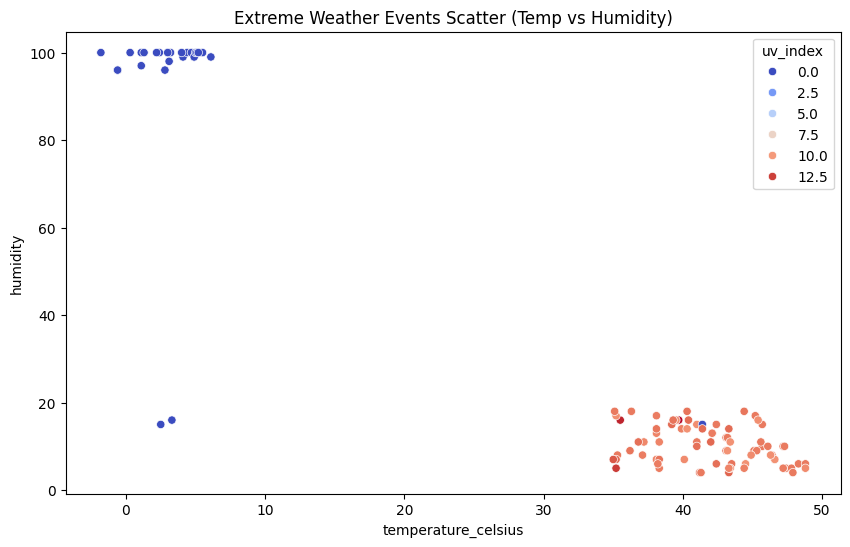

In [8]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=extreme_events, x='temperature_celsius', y='humidity', hue='uv_index', palette='coolwarm')
plt.title('Extreme Weather Events Scatter (Temp vs Humidity)')
plt.show()

## Compare Weather Conditions Across Regions

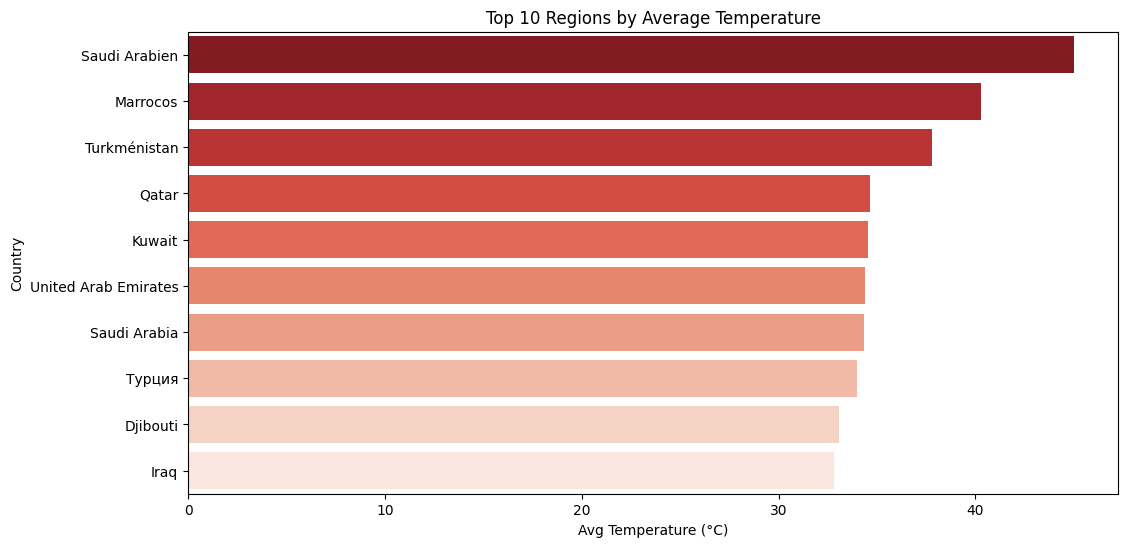

In [9]:
# Average temperature & humidity by country
region_stats = df.groupby('country')[['temperature_celsius', 'humidity', 'uv_index']].mean().reset_index()

# Sort top 10 hottest countries
region_top_temp = region_stats.sort_values(by='temperature_celsius', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='temperature_celsius', y='country',hue='country', data=region_top_temp, palette='Reds_r')
plt.title('Top 10 Regions by Average Temperature')
plt.xlabel('Avg Temperature (°C)')
plt.ylabel('Country')
plt.show()

In [10]:
import pycountry

def get_iso3(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except LookupError:
        return None

region_stats['iso_alpha'] = region_stats['country'].apply(get_iso3)

In [11]:
region_stats['iso_alpha'].isna().sum()

33

In [12]:
region_stats[region_stats['iso_alpha'].isna()]['country']

28                             Bélgica
32                          Cape Verde
41                       Cote d'Ivoire
46        Democratic Republic of Congo
57                             Estonie
59                        Fiji Islands
77                                Inde
87                               Jemen
92                             Komoren
93                              Kosovo
95                         Kyrghyzstan
100                            Letonia
106                          Macedonia
113                            Malásia
114                           Marrocos
119                            Mexique
120                         Micronesia
145                            Polônia
149                             Russia
154    Saint-Vincent-et-les-Grenadines
158                      Saudi Arabien
161                 Seychelles Islands
174                          Swaziland
178                           Südkorea
187                             Turkey
189                      

In [13]:
manual_map = {
    'Bélgica': 'BEL',
    'Cape Verde': 'CPV',
    "Cote d'Ivoire": 'CIV',
    'Democratic Republic of Congo': 'COD',
    'Estonie': 'EST',
    'Fiji Islands': 'FJI',
    'Inde': 'IND',
    'Jemen': 'YEM',
    'Komoren': 'COM',
    'Kosovo': 'XKX',
    'Kyrghyzstan': 'KGZ',
    'Letonia': 'LVA',
    'Macedonia': 'MKD',
    'Malásia': 'MYS',
    'Marrocos': 'MAR',
    'Mexique': 'MEX',
    'Micronesia': 'FSM',
    'Polônia': 'POL',
    'Russia': 'RUS',
    'Saint-Vincent-et-les-Grenadines': 'VCT',
    'Saudi Arabien': 'SAU',
    'Seychelles Islands': 'SYC',
    'Swaziland': 'SWZ',
    'Turkey': 'TUR',
    'Turkménistan': 'TKM',
    'USA United States of America': 'USA',
    'Vatican City': 'VAT',
    'Польша': 'POL',
    'Турция': 'TUR',
    '火鸡': 'TUR'
}


In [14]:
region_stats['iso_alpha'] = region_stats.apply(
    lambda row: manual_map.get(row['country'], row['iso_alpha']),
    axis=1
)
region_stats['iso_alpha'].isna().sum()

3

In [15]:
import plotly.express as px

fig = px.choropleth(
    region_stats,
    locations='iso_alpha',
    locationmode='ISO-3',
    color='temperature_celsius',
    hover_name='country',
    color_continuous_scale='RdYlBu_r',
    title='Average Temperature by Country'
)
fig.show()